In [1]:
import pandas as pd
import numpy as np
import nltk
import spacy
import os,re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_colwidth",200)

In [5]:
inpdir=r'D:\NLP\Analytics Vidhya\bbcsports\bbc_sports_articles'

In [6]:
articles=[]

In [7]:
for folder,subfolder,files in os.walk(inpdir):
    for file in files:
        f = os.path.join(folder,file)
        f=open(f,"r",encoding="utf-8")
        text=f.read()
        articles.append(text)
        

In [8]:
len(articles)

471

In [9]:
articles[54]

'Holmes is hit by hamstring injury\n\nKelly Holmes has been forced out of this weekend\'s European Indoor Athletics Championships after picking up a hamstring injury during training.\n\nThe double Olympic champion said: "I am very disappointed that I have been forced to withdraw. "I can hardly walk at the moment and I won\'t be able to do any running for two or three weeks although I\'ll be keeping fit as best I can." Holmes will have now have intensive treatment in South Africa.\n\nThe 34-year-old made a cautious start to the season but looked back to her best when she stormed to the 1,000m title at the Birmingham Grand Prix 10 days ago. After that race and more progress in training, Holmes revealed she had decided to compete at the European Indoors before her plans were wrecked last weekend. "On Saturday night I pulled my hamstring running the last bend on my final 200m of the night," said Holmes. "I was going really, really well when I felt a massive spasm in my left leg and my hams

In [10]:
clean_article=[]

In [11]:
clean_article = [re.sub('[^a-zA-Z]',' ',i)for i in articles]


In [12]:
clean_article[54]

'Holmes is hit by hamstring injury  Kelly Holmes has been forced out of this weekend s European Indoor Athletics Championships after picking up a hamstring injury during training   The double Olympic champion said   I am very disappointed that I have been forced to withdraw   I can hardly walk at the moment and I won t be able to do any running for two or three weeks although I ll be keeping fit as best I can   Holmes will have now have intensive treatment in South Africa   The    year old made a cautious start to the season but looked back to her best when she stormed to the      m title at the Birmingham Grand Prix    days ago  After that race and more progress in training  Holmes revealed she had decided to compete at the European Indoors before her plans were wrecked last weekend   On Saturday night I pulled my hamstring running the last bend on my final    m of the night   said Holmes   I was going really  really well when I felt a massive spasm in my left leg and my hamstring ble

In [13]:
clean_article =[ " ".join([w for w in word.split() if len(w)>1]) for word in clean_article]

In [14]:
clean_article[51]

'Holmes starts with GB events Kelly Holmes will start with series of races in Britain Holmes will make her first track appearance on home soil since winning double Olympic gold in January Norwich Union International in Glasgow She will also run in the Grand Prix in Birmingham in February and may defend her indoor AAA title in Sheffield earlier that month am still competitive and still want to win she said an athlete and can wait to get back on the track She added These events are also great opportunity to thank the British public for the enormous levels of support they have given me from the moment stepped off that plane from Greece The Glasgow meeting will see Holmes compete over in five way match against Sweden France Russia and Italy'

In [15]:
clean_article=[i.lower() for i in clean_article]

In [16]:
clean_article[54]

'holmes is hit by hamstring injury kelly holmes has been forced out of this weekend european indoor athletics championships after picking up hamstring injury during training the double olympic champion said am very disappointed that have been forced to withdraw can hardly walk at the moment and won be able to do any running for two or three weeks although ll be keeping fit as best can holmes will have now have intensive treatment in south africa the year old made cautious start to the season but looked back to her best when she stormed to the title at the birmingham grand prix days ago after that race and more progress in training holmes revealed she had decided to compete at the european indoors before her plans were wrecked last weekend on saturday night pulled my hamstring running the last bend on my final of the night said holmes was going really really well when felt massive spasm in my left leg and my hamstring blew saw the doctor here and he has said it is not serious but it fru

In [17]:
def freq_words(x,terms=30):
    text=' '.join([text for text in x])
    all_words = text.split()
    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    d = words_df.nlargest(columns='count',n=terms)
    
    plt.figure(figsize=(20,6))
    ax=sns.barplot(data=d,x='word',y='count')
    ax.plot()

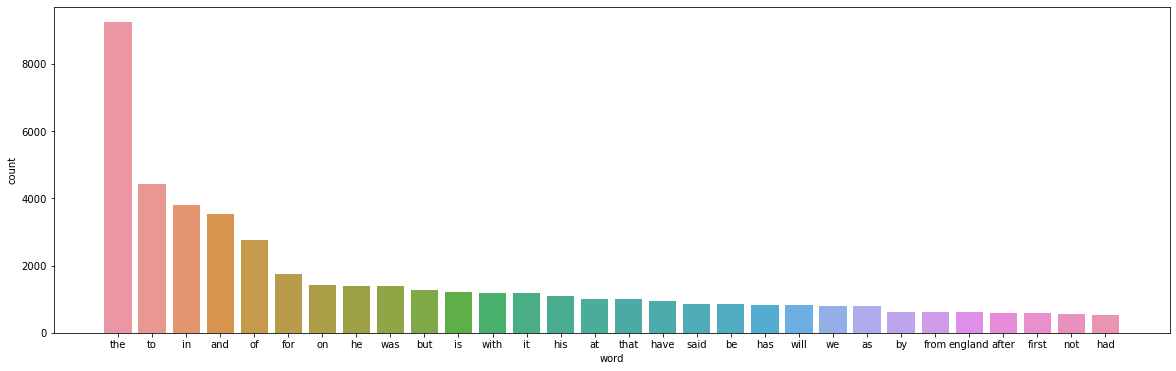

In [18]:
freq_words(clean_article)

In [19]:
nlp = spacy.load('en_core_web_sm')

In [20]:
clean_article = [ ' '.join([token.lemma_ for token in nlp(text)]) for text in clean_article]

In [21]:
clean_article = [' '.join([w for w in x.split() if nlp.vocab[w].is_stop==False]) for x in clean_article]

In [22]:
clean_article[50]

'iaaf rule greek sprint pair greek sprinter kostas kenteris katerina thanou expect find wednesday -PRON- ban miss drug test summer international association athletics federations iaaf council hold conference tuesday set announce -PRON- decision kenteris thanou suspend year duo withdraw olympics miss test claim -PRON- suffer motorcycle crash greek authority bring criminal charge sprinter avoid drug test fake accident -PRON- coach christos tzekos face charge await trial date iaaf determine sprinter future track carefully consider evidence sport rule body expect direct greek federation action -PRON- sprinters kenteris thanou appeal decision court arbitration sport sprinter send write explanation iaaf account iaaf send official warning sprinter coach tzekos -PRON- discover training qatar crete -PRON- -PRON- kenteris thanou skip test tel aviv chicago -PRON- decide fly greece early olympics pair dramatically miss test athens withdraw games kenteris win gold sydney olympics thanou win silver'

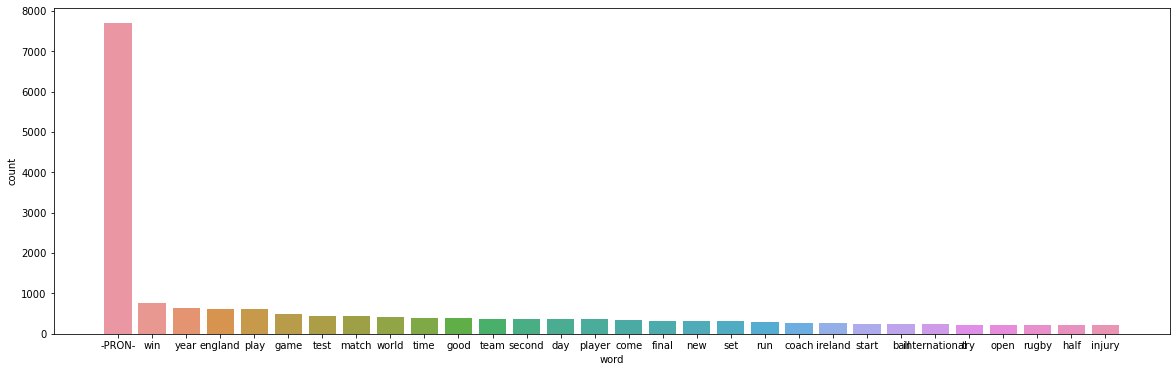

In [23]:
freq_words(clean_article,30)

In [24]:
clean_article=[re.sub('-PRON-',' ',i) for i in clean_article]

In [25]:
clean_article[0]

'claxton hunt major medal british hurdler sarah claxton confident   win   major medal month european indoor championships madrid year old smash british record hurdle twice season set new mark second win aaas title confident claxton race   come long   training think chance medal claxton win national hurdles title past year struggle translate   domestic success international stage scotland bear athlete equal fifth fast time world year week birmingham grand prix claxton leave european medal favourite russian irina shevchenko trail sixth spot time claxton prepare campaign hurdle explain   leap form previous season year old contest long jump colchester london   focus   attention claxton   new training regime pay dividend european indoor place march'

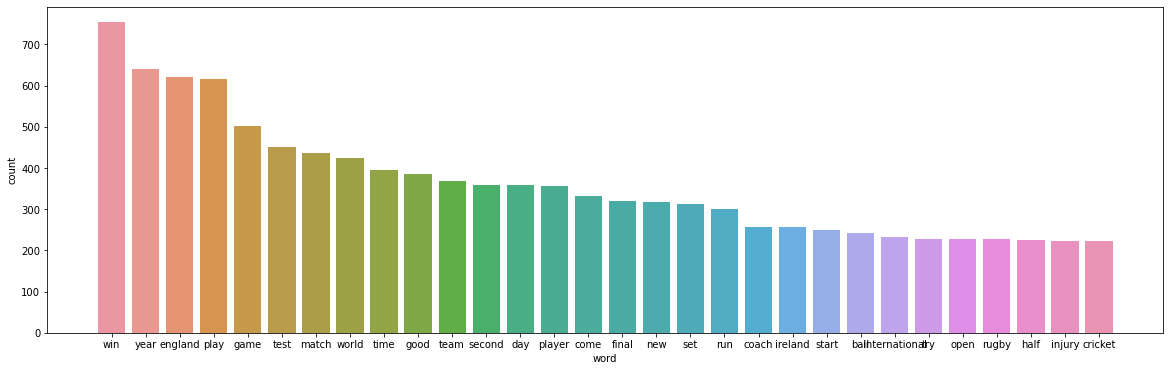

In [26]:
freq_words(clean_article,terms=30)

In [27]:
def get_words(x):
  # combine all the articles  
  text = ' '.join([text for text in x])
  # split text into words   
  return set(text.split())

In [28]:
# get unique words in the articles
unique_words = get_words(clean_article)

# count of unique words
len(unique_words)

7773

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer()
    
X = vectorizer.fit_transform(clean_article)

X.shape

(471, 7773)

In [31]:
X

<471x7773 sparse matrix of type '<class 'numpy.float64'>'
	with 54642 stored elements in Compressed Sparse Row format>

In [32]:
X_df=pd.DataFrame.sparse.from_spmatrix(X,columns=vectorizer.get_feature_names(),index=range(len(clean_article)))

In [33]:
X_df.iloc[:10,1100:1200]

,century,ceplak,ceremony,ceri,certain,certainly,certainty,chabal,chair,chairman,...,christmas,christophe,christopher,christos,chronicle,chuck,chuckle,chunk,churlishly,chuter
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.259386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
vectorizer=TfidfVectorizer()
vectorizer=TfidfVectorizer(max_features=1000,min_df=5,max_df=0.9)  #min_df-->words should occur atleast 5 times   
#max_df = the word occur in each documnet should not be more than 90%
X=vectorizer.fit_transform(clean_article)
X.shape

(471, 1000)

In [37]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=4, random_state=12, n_iter=100)

In [38]:
svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
       random_state=12, tol=0.0)

In [41]:
# get column names of document term matrix
terms = vectorizer.get_feature_names()


In [51]:
len(svd_model.components_[3])

1000

In [55]:
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
    #print(sorted_terms)
    
    print("Topic "+str(i)+": ")
    topics = []
    for t in sorted_terms:
        topics.append(t[0])
    
    print(topics)
    print('\n')

Topic 0: 
['england', 'win', 'play', 'year', 'game', 'test', 'match', 'world', 'good', 'team', 'player', 'ireland', 'final', 'time', 'day', 'new', 'cricket', 'rugby', 'second', 'come', 'coach', 'france', 'set', 'open', 'injury', 'run', 'cup', 'think', 'wales', 'tour', 'australia', 'half', 'south', 'series', 'start', 'international', 'nation', 'victory', 'try', 'beat', 'champion', 'week', 'captain', 'great', 'season', 'ball', 'williams', 'robinson', 'lose', 'zealand']


Topic 1: 
['win', 'champion', 'seed', 'indoor', 'open', 'title', 'world', 'olympic', 'race', 'final', 'set', 'year', 'european', 'roddick', 'woman', 'round', 'event', 'federer', 'beat', 'compete', 'hewitt', 'break', 'britain', 'grand', 'australian', 'record', 'birmingham', 'gold', 'american', 'agassi', 'athens', 'british', 'athlete', 'jump', 'championship', 'second', 'davenport', 'medal', 'holmes', 'tennis', 'safin', 'double', 'henman', 'slam', 'wimbledon', 'madrid', 'old', 'marathon', 'cross', 'francis']


Topic 2: 
['e